# 인공위성에서 본 호주 산불 데이터 


## 필요한 라이브러리와 데이터를 불러오자

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

# 호주의 데이터를 불러오자 

판다스를 이용하자

In [8]:
df= pd.read_csv('./input/australia.csv')
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

In [9]:
df.tail()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
36006  -28.0656   131.6334       312.7   1.2    1.1  2019-09-30      1644   
36007  -28.2625   128.5494       304.9   1.0    1.0  2019-09-30      1644   
36008  -28.2941   128.5123       301.7   1.0    1.0  2019-09-30      1644   
36009  -28.3001   128.5530       303.6   1.0    1.0  2019-09-30      1644   
36010  -30.8641   121.4995       309.1   1.8    1.3  2019-09-30      1645   

      satellite instrument  confidence  version  bright_t31   frp daynight  \
36006      Aqua      MODIS          85      6.3       292.9  14.2        N   
36007      Aqua      MODIS          27      6.3       290.9   6.4        N   
36008      Aqua      MODIS          43      6.3       290.4   5.5        N   
36009      Aqua      MODIS          41      6.3       290.3   5.7        N   
36010      Aqua      MODIS          77      6.3       290.9  23.0        N   

       type  
36006     0  
36007     0  
36008     0  
36009     0  
36010     2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


## 데이터를 전처리합시다

In [11]:
df_fire=df.drop(['acq_date','acq_time','satellite','instrument','version','type'],axis=1)

In [12]:
daynight = pd.get_dummies(df_fire['daynight'],drop_first=True)
df_fire.drop(['daynight'],axis=1,inplace=True)
df_fire = pd.concat([df_fire,daynight],axis=1)


In [13]:
df_fire.head(5)

latitude  longitude  brightness  scan  track  confidence  bright_t31   frp  \
0  -11.8070   142.0583       313.0   1.0    1.0          48       297.3   6.6   
1  -11.7924   142.0850       319.3   1.0    1.0          71       297.3  11.3   
2  -12.8398   132.8744       311.6   3.1    1.7          42       298.7  23.1   
3  -14.4306   143.3035       310.1   1.1    1.1          33       296.1   6.5   
4  -12.4953   131.4897       310.3   4.0    1.9          36       298.8  27.6   

   N  
0  0  
1  0  
2  0  
3  0  
4  0

#### 변수들 사이의 상관관계를 보자 .

confusion matrix를 이용

<AxesSubplot:>

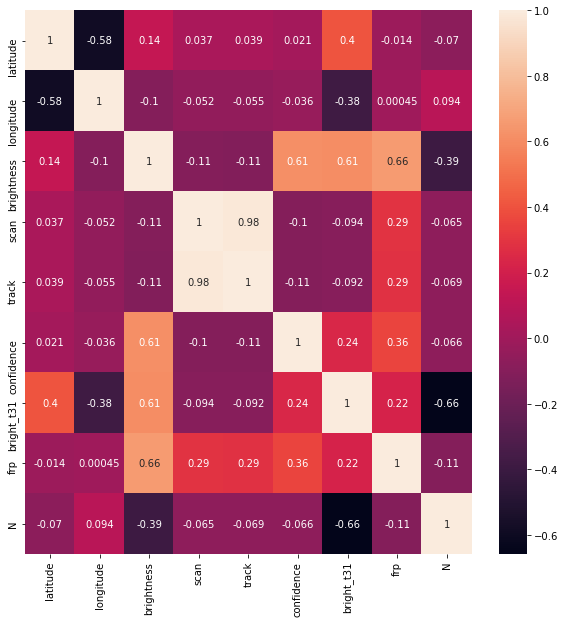

In [17]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df_fire.corr(), annot=True)


#### 상관관계를 시각화 하자.

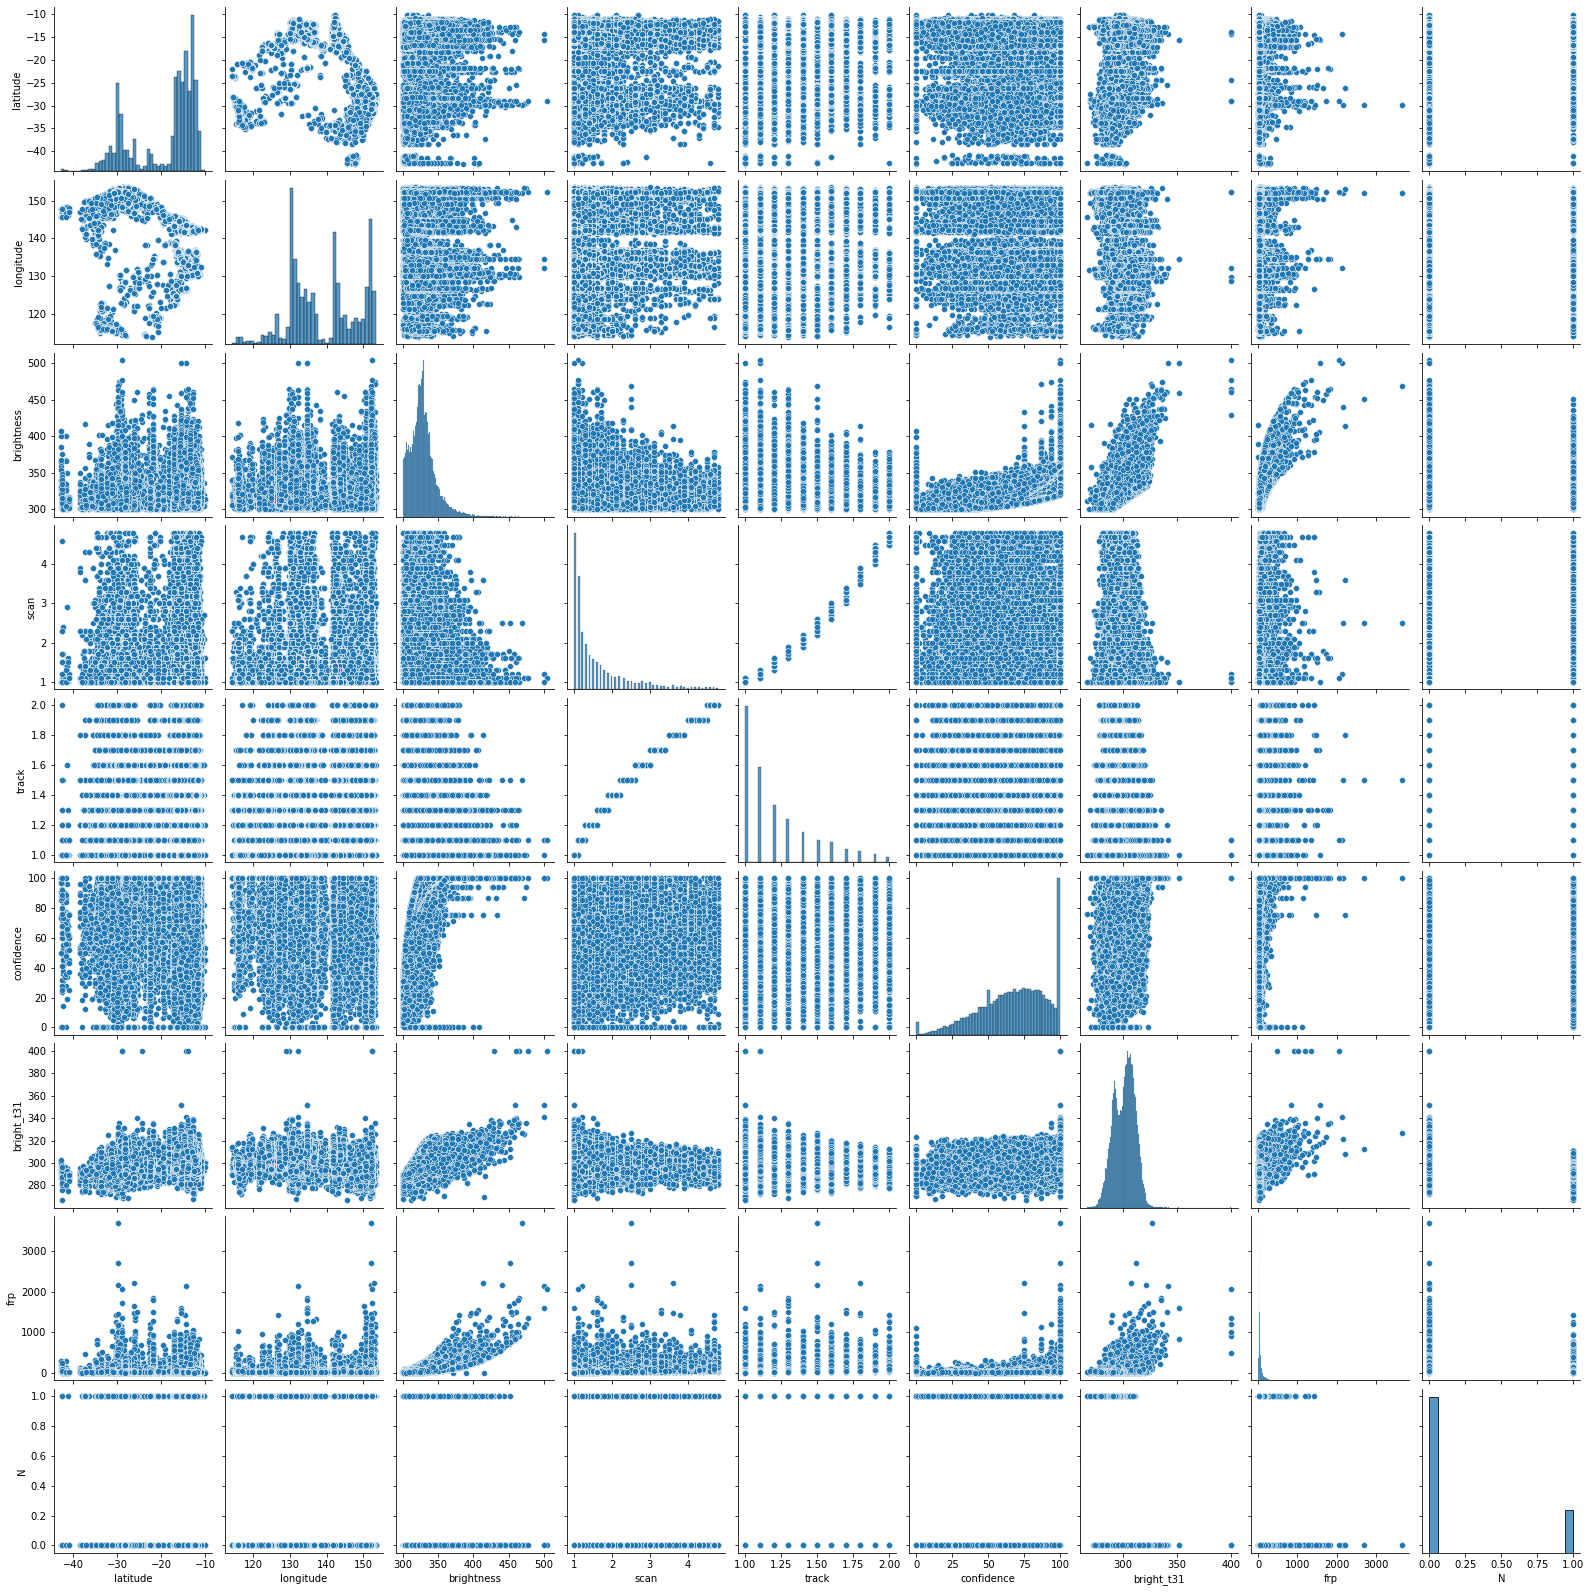

In [18]:
sns.pairplot(df_fire)

## 훈련을 위한 데이터 분할 

In [19]:
X= df_fire.drop('frp',axis=1)
y=df_fire['frp']

# sci-learn을 이용하자. 


In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.4, random_state=108)


## 모델 평가를 위해서 mse, mae, rmse 등 사용

In [22]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

## Ridge 회귀를 사용 




In [23]:
from sklearn.linear_model import Ridge
RidgeReg= Ridge()
RidgeReg.fit(X_train,y_train)
pred= RidgeReg.predict(X_test)


In [24]:
results_df= append_results("Ridge Regression",Ridge(),results_df,y_test,pred)
results_df

Model  Cross Val Score          MAE        MSE      RMSE  \
0  Ridge Regression        26.410684  3800.082185  61.644807  0.620006   

         R2  
0  0.641694

c:\programdata\anaconda3\envs\tf2.cpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

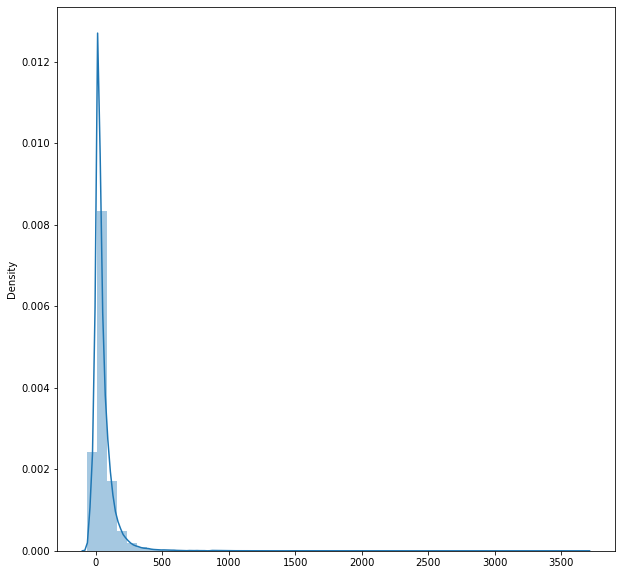

In [25]:
figure= plt.figure(figsize=(10,10))
sns.distplot((y_test,pred))

##  Lasso 회귀

In [26]:
from sklearn.linear_model import Lasso
LassoReg= Lasso()
LassoReg.fit(X_train,y_train)
pred= LassoReg.predict(X_test)


In [27]:
results_df= append_results("Lasso Regression",Lasso(),results_df,y_test,pred)
results_df

Model  Cross Val Score          MAE        MSE      RMSE  \
0  Ridge Regression        26.410684  3800.082185  61.644807  0.620006   
1  Lasso Regression        25.895169  3845.899406  62.015316  0.615424   

         R2  
0  0.641694  
1  0.644719

c:\programdata\anaconda3\envs\tf2.cpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

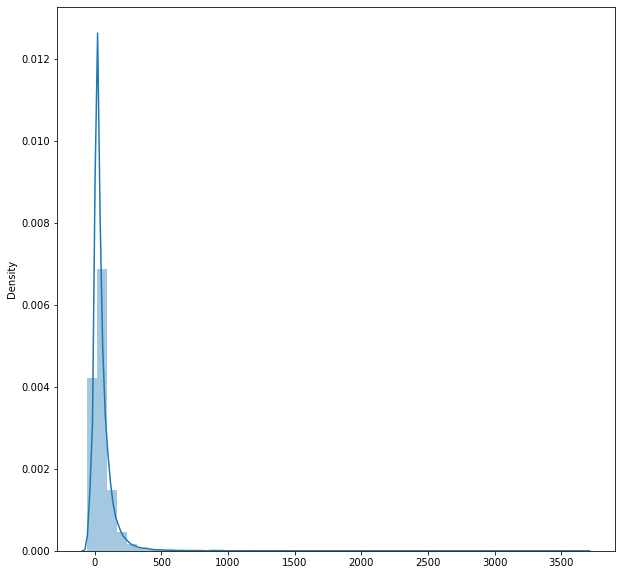

In [28]:
figure= plt.figure(figsize=(10,10))
sns.distplot((y_test,pred))